<a href="https://colab.research.google.com/github/fininsight/page-election/blob/master/mhlee/%EC%9D%B4%EB%AF%BC%ED%98%B8_%EB%89%B4%EC%8A%A4%EB%B8%94%EB%A1%9C%EA%B7%B8_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
파일명 = "/content/drive/My Drive/10 Insight Page/202003 21대 총선분석 프로젝트/데이터 수집/네이버 블로그/21대총선.json"

In [ ]:
import pandas as pd
df = pd.read_json(파일명)


In [ ]:
df_count = df.groupby([df['date'].dt.to_period('d')])['date'].agg(['count'])

In [ ]:
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


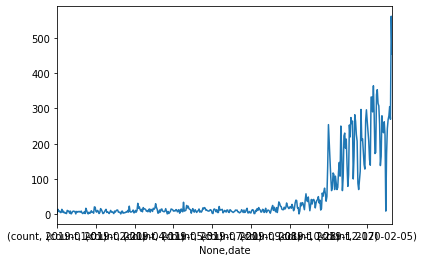

In [ ]:
# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')
df_count.unstack().plot.line()

In [ ]:
!sudo apt-get install g++ openjdk-7-jdk # Install Java 1.7+
!sudo apt-get install python-dev; pip install konlpy     # Python 2.x
!sudo apt-get install python3-dev; pip3 install konlpy   # Python 3.x
!sudo apt-get install curl
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package openjdk-7-jdk is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

E: Package 'openjdk-7-jdk' has no installation candidate
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-dev is already the newest version (2.7.15~rc1-1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
     |████████████████████████████████| 19.4MB 78.9MB/s 
     |████████████████████████████████| 2.4MB 51.0MB/s 
     |████████████████████████████████| 92kB 13.8MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Reading package 

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

tokenized_doc = []

for i, row in df.iterrows() :
  try : 
    tokenized_doc.append([w for w in mecab.nouns(row['content']) if len(w) > 1])
  except :
    print(row['content'])

In [ ]:
import gensim
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) # 수행된 결과에서 두번째 뉴스 출력. 첫번째 문서의 인덱스는 0

from gensim.models import TfidfModel

tfidf_model = TfidfModel(corpus)
tfidf_model[corpus]

import gensim
NUM_TOPICS = 10 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)

[(11, 1), (38, 1), (43, 4), (44, 1), (71, 2), (72, 2), (81, 2), (86, 3), (105, 3), (121, 6), (149, 1), (150, 1), (153, 1), (154, 3), (156, 1), (217, 24), (228, 2), (231, 2), (237, 2), (249, 1), (250, 4), (253, 1), (272, 4), (277, 1), (278, 1), (289, 1), (299, 2), (326, 3), (328, 2), (334, 3), (335, 1), (364, 1), (387, 3), (389, 1), (390, 1), (391, 2), (392, 1), (393, 1), (394, 2), (395, 1), (396, 1), (397, 1), (398, 1), (399, 2), (400, 1), (401, 1), (402, 3), (403, 1), (404, 1), (405, 2), (406, 1), (407, 1), (408, 1), (409, 1), (410, 1), (411, 1), (412, 1), (413, 2), (414, 1), (415, 1), (416, 1), (417, 1), (418, 2), (419, 1), (420, 1), (421, 1), (422, 1), (423, 1), (424, 3), (425, 1), (426, 2), (427, 1), (428, 1), (429, 1), (430, 1), (431, 1), (432, 2), (433, 1), (434, 1), (435, 1), (436, 1), (437, 1), (438, 2), (439, 1), (440, 1), (441, 1), (442, 1), (443, 1), (444, 1), (445, 1), (446, 1), (447, 1), (448, 1), (449, 1), (450, 1), (451, 3), (452, 3), (453, 1), (454, 3), (455, 1), (456, 

In [ ]:
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.056*"선거" + 0.048*"후보" + 0.030*"선거구" + 0.026*"예비" + 0.022*"국회의원" + 0.018*"총선" + 0.016*"광주" + 0.014*"획정" + 0.009*"등록" + 0.009*"투표"')
(1, '0.023*"코로나" + 0.009*"검찰" + 0.009*"수사" + 0.007*"정부" + 0.007*"확진" + 0.006*"관련" + 0.006*"바이러스" + 0.006*"서울" + 0.006*"기자" + 0.006*"장관"')
(2, '0.017*"청년" + 0.017*"정치" + 0.016*"사회" + 0.015*"여성" + 0.014*"국회" + 0.013*"정책" + 0.012*"정의당" + 0.009*"국민" + 0.009*"장애" + 0.009*"대표"')
(3, '0.020*"국민" + 0.018*"정치" + 0.016*"대통령" + 0.013*"우리" + 0.011*"사람" + 0.010*"정부" + 0.009*"정권" + 0.008*"생각" + 0.008*"문재인" + 0.008*"대한민국"')
(4, '0.009*"미국" + 0.008*"한국" + 0.006*"중국" + 0.005*"세계" + 0.005*"유튜브" + 0.005*"일본" + 0.004*"관련" + 0.004*"영화" + 0.004*"투자" + 0.004*"결정"')
(5, '0.016*"지역" + 0.012*"도시" + 0.010*"공약" + 0.010*"사업" + 0.009*"경제" + 0.007*"정부" + 0.007*"주택" + 0.007*"정책" + 0.007*"추진" + 0.007*"시장"')
(6, '0.036*"의원" + 0.033*"대표" + 0.029*"통합" + 0.023*"국회" + 0.014*"미래" + 0.014*"총선" + 0.013*"자유" + 0.013*"공천" + 0.013*"황교안" + 0.011*"국당"')
(7, '0.014*"구미" + 0.013*"국회의원" + 0.011*"시민

In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

KeyboardInterrupt: ignored

# WordPieceModel

In [ ]:
from collections import Counter
from collections import defaultdict

class BytePairEncoder:
    
    def __init__(self, n_iters=10, verbose=True):
        self.n_iters = n_iters if n_iters > 0 else 10
        self.units = {}
        self.max_length = 0
        self.verbose = verbose
        
    def train(self, sents):
        if self.verbose:
            print('begin vocabulary scanning', end='', flush=True)
        
        vocabs = self._sent_to_vocabs(sents)
        if self.verbose:
            print('\rterminated vocabulary scanning', flush=True)
        
        self.units = self._build_subword_units(vocabs)
    
    def _sent_to_vocabs(self, sents):        
        vocabs = Counter((eojeol.replace('_', '') for sent in sents for eojeol in sent.split() if eojeol))
        return {' '.join(w) + ' _': c for w,c in vocabs.items() if w}
        
    def _build_subword_units(self, vocabs):
        def get_stats(vocabs):
            pairs = defaultdict(int)
            for word, freq in vocabs.items():
                symbols = word.split()
                for i in range(len(symbols)-1):
                    pairs[(symbols[i],symbols[i+1])] += freq
            return pairs
        
        def merge_vocab(pair, v_in):
            v_out = {}
            bigram = ' '.join(pair)
            replacer = ''.join(pair)
            for word, freq in v_in.items():
                w_out = word.replace(bigram, replacer)
                v_out[w_out] = freq
            return v_out
        
        for i in range(self.n_iters + 1):
            pairs = get_stats(vocabs)
            if not pairs:
                break
            best = max(pairs, key=pairs.get)
            vocabs = merge_vocab(best, vocabs)
            if self.verbose and i % 100 == 99:
                print('\rtraining bpe {} / {}'.format(i+1, self.n_iters), end='', flush=True)
        if self.verbose:
            print('\rtraining bpe was done{}'.format(' '*40))
        
        units = {}
        for word, freq in vocabs.items():
            for unit in word.split():
                units[unit] = units.get(unit, 0) + freq
        self.max_length = max((len(w) for w in units))
        return units
    
    def tokenize(self, s):
        return ' '.join([self._tokenize(w) for w in s.split()])
    
    def _tokenize(self, w):
        def initialize(w):
            w += '_'
            subwords = []
            n = len(w)
            for b in range(n):
                for e in range(b+1, min(n, b+self.max_length)+1):
                    subword = w[b:e]
                    if not subword in self.units:
                        continue
                    subwords.append((subword, b, e, e-b))
            return subwords
        
        def longest_match(subwords):
            matched = []
            subwords = sorted(subwords, key=lambda x:(-x[3], x[1]))
            while subwords:
                s, b, e, l = subwords.pop(0) # str, begin, end, length
                matched.append((s, b, e, l))
                removals = []
                for i, (_, b_, e_, _) in enumerate(subwords):
                    if (b_ < e and b < e_) or (b_ < e and e_ > b):
                        removals.append(i)
                for i in reversed(removals):
                    del subwords[i]
            return sorted(matched, key=lambda x:x[1])
        
        subwords = initialize(w)
        subwords = longest_match(subwords)
        subwords = ' '.join([s for s, _, _, _ in subwords])
        return subwords
    
    def save(self, fname):
        with open(fname, 'w', encoding='utf-8') as f:
            f.write('n_iters={}\n'.format(self.n_iters))
            f.write('max_length={}\n'.format(self.max_length))
            for unit, frequency in sorted(self.units.items(), key=lambda x:(-x[1], -len(x[0]))):
                f.write('{}\t{}\n'.format(unit, frequency))
                
    def load(self, fname):
        with open(fname, encoding='utf-8') as f:
            try:
                self.n_iters = int(next(f).strip().split('=')[1])
                self.max_length = int(next(f).strip().split('=')[1])
            except Exception as e:
                print(e)
            
            self.units = {}
            for row in f:
                try:
                    unit, frequency = row.strip().split('\t')
                    self.units[unit] = int(frequency)
                except Exception as e:
                    print('BPE load exception: {}'.format(str(e)))
                    break

In [ ]:
corpus = df["content"].to_list()

In [ ]:
#from bytepairencoder import BytePairEncoder

n_iters = 200
encoder = BytePairEncoder(n_iters)
encoder.train(corpus)

terminated vocabulary scanning
training bpe was done                                        


In [ ]:
for n_doc, doc in enumerate(corpus):
    if not doc:
        continue
        
    print('[doc={}]: {}'.format(n_doc, doc[:200].strip()))
    print('[BPE tokens]: {} ... \n'.format(''.join(encoder.tokenize(doc)[:300])))
    
    if n_doc >= 10:
        break

[doc=0]: &lt; 핫뉴스*좋은 뉴스 골라보기&gt; □2019.02.03□ ■ 정우택 홍준표 난폭운전자, 황교안·오세훈은 ○○ 운전자=충청 출신 자유한국당 당 대표에 도전한 정우택(66) 의원은 2일 오세훈 전 서울시장·홍준표 전 대표·황교안 전 총리 등 유력 주자들을 싸잡아 비판했다.   그는  페이스북을 통해  설 연휴 차량 안전 운전을 빗대 당권 유력 세 후보
[BPE tokens]: & l t; _ 핫 뉴 스 * 좋 은_ 뉴 스_ 골 라 보 기 & g t; _ □ 2019 . 0 2 . 0 3 □ _ ■ _ 정 우 택 _ 홍 준 표 _ 난 폭 운 전 자 ,_ 황 교 안 · 오 세 훈 은_ ○ ○ _ 운 전 자 = 충 청 _ 출 신 _ 자유 한국당_ 당_ 대표 에_ 도 전 한_ 정 우 택 ( 6 6 )_ 의원 은_ 2 일_ 오 세 훈 _ 전_ 서울 시 장 · 홍 준 표 _ 전_ 대표 · 황 교 안_ 전_ 총 리_ 등_ 유 력 _ 주 자 들 을_ 싸 잡 아_ 비 판 했다._ 그 는_ 페 이 스 북 을_ 통 해_ 설 ... 

[doc=1]: 측근 인사 잇단 탈당으로 좁아지는 당내 입지 바른미래당 유승민(4선, 대구 동을) 의원이 점차 고립돼 가면서 출구 전략에 관심이 모아지고 있다. 유승민 의원 / 뉴스티앤티 따뜻한 보수를 내걸고 출범한 바른정당의 창당 동지들이 지난 5.9 대선과 6.13 지방선거를 앞두고 대거 자유한국당으로 복당한데 이어 작년 12월 18일에는 국회 정보위원장을 맡고 있는
[BPE tokens]: 측 근 _ 인 사_ 잇 단 _ 탈 당 으로_ 좁 아 지 는_ 당 내 _ 입 지_ 바 른 미래 당_ 유 승 민 ( 4 선 ,_ 대 구_ 동 을 )_ 의원 이_ 점 차 _ 고 립 돼 _ 가 면서_ 출 구_ 전 략 에_ 관 심 이_ 모 아 지 고_ 있다._ 유 승 민 _ 의원_ / _ 뉴 스 티 앤 티 _ 따 뜻 한_ 보 수 를_ 내 걸 고_ 출 범 한_ 바 른 정당 의_ 창 당_ 동 지 들이_ 지난_ 5 . 9 _ 대 선 과_ 6 . 1 3

In [ ]:
encoder.save('/content/drive/My Drive/10 Insight Page/202003 21대 총선분석 프로젝트/데이터 수집/네이버 블로그/bpe1000')

In [ ]:
#from bytepairencoder import BytePairEncoder

n_iters = 5000
encoder = BytePairEncoder(n_iters)
encoder.train(corpus)

from konlpy.tag import Mecab
mecab = Mecab()


for n_doc, doc in enumerate(corpus):
    if not doc:
        continue
        
    print('[doc={}]: {}'.format(n_doc, doc[:200].strip()))
    print('[BPE tokens]: {} ... \n'.format(''.join(encoder.tokenize(doc)[:300])))
    print('[BPE tokens]: {} ... \n'.format(''.join(mecab.morphs(doc)[:300])))
    
    if n_doc >= 10:
        break


encoder.save('/content/drive/My Drive/10 Insight Page/202003 21대 총선분석 프로젝트/데이터 수집/네이버 블로그/bpe1000')

terminated vocabulary scanning
training bpe was done                                        
[doc=0]: &lt; 핫뉴스*좋은 뉴스 골라보기&gt; □2019.02.03□ ■ 정우택 홍준표 난폭운전자, 황교안·오세훈은 ○○ 운전자=충청 출신 자유한국당 당 대표에 도전한 정우택(66) 의원은 2일 오세훈 전 서울시장·홍준표 전 대표·황교안 전 총리 등 유력 주자들을 싸잡아 비판했다.   그는  페이스북을 통해  설 연휴 차량 안전 운전을 빗대 당권 유력 세 후보
[BPE tokens]: &lt;_ 핫 뉴스 * 좋은_ 뉴스_ 골 라 보기 &gt;_ □ 2019.02.0 3 □ _ ■_ 정 우 택_ 홍준표_ 난 폭 운 전자,_ 황교안 · 오세 훈 은_ ○ ○_ 운 전자 = 충청_ 출신_ 자유한국당_ 당_ 대표 에_ 도전한_ 정 우 택 (66 )_ 의원은_ 2일_ 오세훈_ 전_ 서울시장 · 홍준표_ 전_ 대표 · 황교안_ 전_ 총리_ 등_ 유력_ 주 자들을_ 싸 잡 아_ 비판했다._ 그는_ 페이스북 을_ 통해_ 설_ 연휴 _ 차량_ 안전_ 운 전을_ 빗 대_ 당 권_ 유력_ 세_ 후보 들의_ 약 점을_ 들 췄 다._ 그 ... 

[doc=1]: 측근 인사 잇단 탈당으로 좁아지는 당내 입지 바른미래당 유승민(4선, 대구 동을) 의원이 점차 고립돼 가면서 출구 전략에 관심이 모아지고 있다. 유승민 의원 / 뉴스티앤티 따뜻한 보수를 내걸고 출범한 바른정당의 창당 동지들이 지난 5.9 대선과 6.13 지방선거를 앞두고 대거 자유한국당으로 복당한데 이어 작년 12월 18일에는 국회 정보위원장을 맡고 있는
[BPE tokens]: 측근_ 인사_ 잇 단_ 탈당으로_ 좁 아 지는_ 당내_ 입 지_ 바른미래당_ 유승민 (4 선,_ 대구_ 동 을)_ 의원이_ 점 차_ 고 립 돼_ 가 면서_ 출 구_ 전략 에_ 관심이_ 모 아 지고_ 있다._ 유승민_ 의원_ /_ 뉴스 티 앤 티_ 따뜻 한_ 보수를_ 내 걸고

In [ ]:
corpus[0]

"&lt; 핫뉴스*좋은 뉴스 골라보기&gt; □2019.02.03□ ■ 정우택 홍준표 난폭운전자, 황교안·오세훈은 ○○ 운전자=충청 출신 자유한국당 당 대표에 도전한 정우택(66) 의원은 2일 오세훈 전 서울시장·홍준표 전 대표·황교안 전 총리 등\xa0유력 주자들을 싸잡아 비판했다. \xa0 그는\xa0 페이스북을 통해\xa0 설 연휴 차량 안전 운전을 빗대 당권 유력 세 후보들의 약점을 들췄다. 그는 대선주자로서 정치 초년생은 신선함이 있을지 모르나, 전국 단위 총선거를 지휘해야 할 당 대표로서 정치 초년생은 신선함이 아니라 미숙함이라고 말했다. 그러면서\xa0 황 전 총리, 오 전 시장은 당운영이나 선거 차원에서 아직 초보운전자에 불과하다라면서 그리고 홍 전 대표는 당 운영과 지방선거에서 이미 검증된 난폭 운전자라고 꼬집었다. 정의원은 어떻게 초보운전자와 난폭 운전자에게 당의 존망과 나라의 미래가 걸린 총선거를 믿고 맡길 수 있겠느냐라고 지적했다. 그는\xa0 이제는 이번 전대에서 선출될 당 대표의 시대적 소명과 역할, 그리고 자격과 자질을 평가함에 있어, 일부 후보들에 대한 언론의 과도한 관심과 인위적 구도 설정에 대해서도 당을 위해서, 총선 승리를 위해서 냉정하고 합리적으로 생각하고 판단해야 할 때라고 말했다. 이어\xa0경험 많고 믿음직한 자신이\xa0국민의 신뢰와 기대를 모으며 승리의 고지로 모시고 가겠다는 입장과 함께\xa0 당의 안전한 운전은 전적으로 자신이 적임자라고 자신했다. ■손석희,걱정시켜미안하다고 말한 이유.= \xa0 손석희 JTBC 대표이사 사장이\xa0JTBC 직원들에게 걱정시켜 미안하다라며 앞으로 흔들림 없이 헤쳐나가겠다라고 전했다. 손 사장은 지난 1일 이메일을 보내, 사장이 사원들을 걱정시켜 미안하다. 나도 황당하고 당혹스러운 게 사실이라면서 이같이 말했다. 그는\xa0 \xa0그러나 일일이 대응하지 않는 것이 맞고 주변에서도 그렇게 하는 것이 좋다고 해서 극구 자제해왔다라며\xa0 지금 나오고 있는 대부분의 이야기는 기사라

In [ ]:
encoder.tokenize(corpus[0])

"&lt;_ 핫 뉴스 * 좋은_ 뉴스_ 골 라 보기 &gt;_ □ 2019.02.0 3 □ _ ■_ 정 우 택_ 홍준표_ 난 폭 운 전자,_ 황교안 · 오세 훈 은_ ○ ○_ 운 전자 = 충청_ 출신_ 자유한국당_ 당_ 대표 에_ 도전한_ 정 우 택 (66 )_ 의원은_ 2일_ 오세훈_ 전_ 서울시장 · 홍준표_ 전_ 대표 · 황교안_ 전_ 총리_ 등_ 유력_ 주 자들을_ 싸 잡 아_ 비판했다._ 그는_ 페이스북 을_ 통해_ 설_ 연휴 _ 차량_ 안전_ 운 전을_ 빗 대_ 당 권_ 유력_ 세_ 후보 들의_ 약 점을_ 들 췄 다._ 그는_ 대선 주 자 로서_ 정치_ 초 년 생 은_ 신 선 함 이_ 있을 지_ 모르 나,_ 전국_ 단 위_ 총선거를_ 지휘 해야_ 할_ 당_ 대표 로서_ 정치_ 초 년 생 은_ 신 선 함 이_ 아니라_ 미 숙 함 이라고_ 말했다._ 그러면서_ 황_ 전_ 총리,_ 오_ 전_ 시장은_ 당 운영 이나_ 선거_ 차원에서_ 아직_ 초 보 운 전자에_ 불과 하다 라 면서_ 그리고_ 홍_ 전_ 대표는_ 당_ 운영 과_ 지방선거에서_ 이미_ 검증 된_ 난 폭_ 운 전자 라고_ 꼬 집 었다._ 정의원은_ 어떻게_ 초 보 운 전자와_ 난 폭_ 운 전자에게_ 당의_ 존 망 과_ 나라의_ 미래 가_ 걸 린_ 총선거를_ 믿 고_ 맡 길_ 수_ 있겠 느냐 라고_ 지적했다._ 그는_ 이제는_ 이번_ 전 대 에서_ 선출 될_ 당_ 대표의_ 시대 적_ 소 명과_ 역할 ,_ 그리고_ 자격 과_ 자 질을_ 평가 함 에_ 있어 ,_ 일부_ 후보 들에_ 대한_ 언론 의_ 과 도 한_ 관심 과_ 인 위 적_ 구 도_ 설 정에_ 대해서도_ 당을_ 위해서,_ 총선_ 승리를_ 위해서_ 냉 정 하고_ 합리 적으로_ 생각 하고_ 판단 해야_ 할_ 때 라고_ 말했다._ 이어_ 경험 _ 많 고_ 믿 음 직한_ 자신이_ 국민의_ 신뢰 와_ 기대를_ 모 으며_ 승리 의_ 고 지로_ 모 시고_ 가 겠다는_ 입장과_ 함께_ 당의_ 안전한_ 운 전 은_ 전 적으로_ 자신이_ 적 임 자 라고_ 자

In [ ]:
encoder.save('./bpe5000')

In [ ]:
df.shape


(21675, 5)

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

for n_doc, doc in enumerate(corpus):
    if not doc:
        continue
        
    print('[doc={}]: {}'.format(n_doc, doc[:200].strip()))
    print('[BPE tokens]: {} ... '.format(''.join(encoder.tokenize(doc)[:300])))
    print('[Mecab]: {} ... \n'.format('/'.join(mecab.morphs(doc)[:300])))
    
    if n_doc >= 10:
        break

[doc=0]: &lt; 핫뉴스*좋은 뉴스 골라보기&gt; □2019.02.03□ ■ 정우택 홍준표 난폭운전자, 황교안·오세훈은 ○○ 운전자=충청 출신 자유한국당 당 대표에 도전한 정우택(66) 의원은 2일 오세훈 전 서울시장·홍준표 전 대표·황교안 전 총리 등 유력 주자들을 싸잡아 비판했다.   그는  페이스북을 통해  설 연휴 차량 안전 운전을 빗대 당권 유력 세 후보
[BPE tokens]: &lt;_ 핫 뉴스 * 좋은_ 뉴스_ 골 라 보기 &gt;_ □ 2019.02.0 3 □ _ ■_ 정 우 택_ 홍준표_ 난 폭 운 전자,_ 황교안 · 오세 훈 은_ ○ ○_ 운 전자 = 충청_ 출신_ 자유한국당_ 당_ 대표 에_ 도전한_ 정 우 택 (66 )_ 의원은_ 2일_ 오세훈_ 전_ 서울시장 · 홍준표_ 전_ 대표 · 황교안_ 전_ 총리_ 등_ 유력_ 주 자들을_ 싸 잡 아_ 비판했다._ 그는_ 페이스북 을_ 통해_ 설_ 연휴 _ 차량_ 안전_ 운 전을_ 빗 대_ 당 권_ 유력_ 세_ 후보 들의_ 약 점을_ 들 췄 다._ 그 ... 
[Mecab]: &/lt/;/핫뉴스/*/좋/은/뉴스/골라/보/기/&/gt/;/□/2019/./02/./03/□/■/정우택/홍준표/난폭/운전자/,/황교안/·/오세훈/은/○○/운전자/=/충청/출신/자유/한/국당/당/대표/에/도전/한/정우택/(/66/)/의원/은/2/일/오세훈/전/서울/시장/·/홍준표/전/대표/·/황교안/전/총리/등/ /유력/주자/들/을/싸잡/아/비판/했/다/./ /그/는/ /페이스북/을/통해/ /설/연휴/차량/안전/운전/을/빗대/당권/유력/세/후보/들/의/약점/을/들췄/다/./그/는/대선/주자/로서/정치/초년생/은/신선/함/이/있/을지/모르/나/,/전국/단위/총선거/를/지휘/해야/할/당/대표/로서/정치/초년생/은/신선/함/이/아니/라/미숙/함/이/라고/말/했/다/./그러/면서/ /황/전/총리/,/오/전/시장/은/당/운영/이나/선거/차원/에서/아직/초보/운전자/에/불과/하/다/라면서/그리고/홍/전/대표/는/당/운영/과/

In [ ]:
encoder.tokenize(corpus[0])

"&lt;_ 핫 뉴스 * 좋은_ 뉴스_ 골 라 보기 &gt;_ □ 2019.02.0 3 □ _ ■_ 정 우 택_ 홍준표_ 난 폭 운 전자,_ 황교안 · 오세 훈 은_ ○ ○_ 운 전자 = 충청_ 출신_ 자유한국당_ 당_ 대표 에_ 도전한_ 정 우 택 (66 )_ 의원은_ 2일_ 오세훈_ 전_ 서울시장 · 홍준표_ 전_ 대표 · 황교안_ 전_ 총리_ 등_ 유력_ 주 자들을_ 싸 잡 아_ 비판했다._ 그는_ 페이스북 을_ 통해_ 설_ 연휴 _ 차량_ 안전_ 운 전을_ 빗 대_ 당 권_ 유력_ 세_ 후보 들의_ 약 점을_ 들 췄 다._ 그는_ 대선 주 자 로서_ 정치_ 초 년 생 은_ 신 선 함 이_ 있을 지_ 모르 나,_ 전국_ 단 위_ 총선거를_ 지휘 해야_ 할_ 당_ 대표 로서_ 정치_ 초 년 생 은_ 신 선 함 이_ 아니라_ 미 숙 함 이라고_ 말했다._ 그러면서_ 황_ 전_ 총리,_ 오_ 전_ 시장은_ 당 운영 이나_ 선거_ 차원에서_ 아직_ 초 보 운 전자에_ 불과 하다 라 면서_ 그리고_ 홍_ 전_ 대표는_ 당_ 운영 과_ 지방선거에서_ 이미_ 검증 된_ 난 폭_ 운 전자 라고_ 꼬 집 었다._ 정의원은_ 어떻게_ 초 보 운 전자와_ 난 폭_ 운 전자에게_ 당의_ 존 망 과_ 나라의_ 미래 가_ 걸 린_ 총선거를_ 믿 고_ 맡 길_ 수_ 있겠 느냐 라고_ 지적했다._ 그는_ 이제는_ 이번_ 전 대 에서_ 선출 될_ 당_ 대표의_ 시대 적_ 소 명과_ 역할 ,_ 그리고_ 자격 과_ 자 질을_ 평가 함 에_ 있어 ,_ 일부_ 후보 들에_ 대한_ 언론 의_ 과 도 한_ 관심 과_ 인 위 적_ 구 도_ 설 정에_ 대해서도_ 당을_ 위해서,_ 총선_ 승리를_ 위해서_ 냉 정 하고_ 합리 적으로_ 생각 하고_ 판단 해야_ 할_ 때 라고_ 말했다._ 이어_ 경험 _ 많 고_ 믿 음 직한_ 자신이_ 국민의_ 신뢰 와_ 기대를_ 모 으며_ 승리 의_ 고 지로_ 모 시고_ 가 겠다는_ 입장과_ 함께_ 당의_ 안전한_ 운 전 은_ 전 적으로_ 자신이_ 적 임 자 라고_ 자